# Дайте мне таблетки от жадности! И побольше, побольше!

![](https://cs4.pikabu.ru/post_img/2016/08/12/8/1471008417115067244.jpg)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats # more style :)
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# Задаченька 1. Функция-няша и функция-бяка!

а) Найдите минимум фукнции $f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 4)^2$

In [18]:
def fun(x):
    """ какая-то приятная функция """
    z = (x[0] - 2) ** 2 + (x[1] - 4) ** 2
    return z

x_init = [0, 0]
optim_res = minimize(fun, x_init)
optim_res

      fun: 9.095763293783874e-17
 hess_inv: array([[ 0.9, -0.2],
       [-0.2,  0.6]])
      jac: array([ 6.37085673e-09, -2.15944951e-09])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([2.        , 3.99999999])

In [3]:
optim_res.x, optim_res.fun

(array([2.        , 3.99999999]), 9.095763293783874e-17)

Теперь добавим в функцию параметр $a$: $f(x_1, x_2) = (x_1 - 2a)^2 + (x_2 - 4)^2$

б) Найдите экстремум функции при $a=4$ и при $a=10$.

In [27]:
def fun(x, a=1):
    """ какая-то приятная функция """
    z = (x[0] - 2 * a) ** 2 + (x[1] - 4) ** 2
    return z

x_init = [0, 0]
optim_res = minimize(fun, x_init, args=4)
optim_res

      fun: 3.131976557517399e-12
 hess_inv: array([[ 0.59999985, -0.19999989],
       [-0.19999989,  0.90000014]])
      jac: array([-1.60278948e-06,  3.16307257e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([7.99999919, 4.00000157])

In [8]:
optim_res = minimize(fun, x_init, args=10)
optim_res

      fun: 2.3881933437907206e-11
 hess_inv: array([[ 0.51923086, -0.09615402],
       [-0.09615402,  0.98076916]])
      jac: array([ 2.14204335e-06, -9.52464809e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([20.00000106,  3.99999523])

Но иногда встречаются функции-бяки :)

$f(x_1, x_2, x_3) = 0.01 (x_1 - 0.5)^2 + |x_1^2 - x_2| + |x_1^2 - x_3|$

в) найдите минимум этой функции устно

г*) найдите минимум этой функции с помощью `minimize` (автор задачи тоже не знает решения)

In [3]:
def byaka(x):
    """ известная неприятная функция """
    z = 0.01 * (x[0] - 0.5) ** 2 + abs(x[0] ** 2 - x[1]) + abs(x[0] ** 2 - x[2])
    return z

x_init = [0, 0, 0]
optim_res = minimize(byaka, x_init, method='powell')
optim_res = minimize(byaka, x_init, method='bfgs')
optim_res = minimize(byaka, x_init, method='nelder-mead')
optim_res


 final_simplex: (array([[0.03077755, 0.00094606, 0.00094727],
       [0.03070671, 0.00094229, 0.00094293],
       [0.03070712, 0.00094213, 0.0009429 ],
       [0.03087131, 0.00095078, 0.00095323]]), array([0.00220291, 0.00220301, 0.00220318, 0.00220326]))
           fun: 0.0022029130300699013
       message: 'Optimization terminated successfully.'
          nfev: 280
           nit: 161
        status: 0
       success: True
             x: array([0.03077755, 0.00094606, 0.00094727])

д) нарисуйте хорошую функцию :)

In [50]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x_mesh, y_mesh = np.meshgrid(x, y)
xy = np.array([x_mesh, y_mesh]).reshape(2, len(x) * len(y)).T
xy

array([[-5.  , -5.  ],
       [-4.75, -5.  ],
       [-4.5 , -5.  ],
       ...,
       [ 4.25,  4.75],
       [ 4.5 ,  4.75],
       [ 4.75,  4.75]])

In [51]:
xy = np.array([x_mesh, y_mesh]).reshape(2, len(x) * len(y)).T
z = np.apply_along_axis(fun, 1, xy)
z

array([130.    , 126.5625, 123.25  , ...,   5.625 ,   6.8125,   8.125 ])

In [52]:
z_mesh = z.reshape(x_mesh.shape[0], -1)

In [53]:
z_mesh.shape

(40, 40)

Text(0.5, 1.0, 'Линии уровня функции fun')

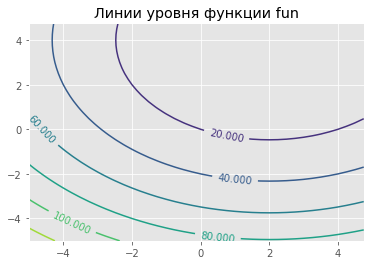

In [55]:
fig, ax = plt.subplots()
contour = ax.contour(x_mesh, y_mesh, z_mesh)
ax.clabel(contour, inline=1, fontsize=10)
ax.set_title('Линии уровня функции fun')



# Задачутка 2. Велика ты, правда, широка стоишь! Ты горами поднялась до поднебесья!

(с) Алексей Толстой

[Как известно](https://www.livelib.ru/quote/305456-malysh-i-karlson-kotoryj-zhivet-na-kryshe-astrid-lindgren), Фрекен Бок пьёт коньяк по утрам.

![](http://semyarf.com/UPLOAD/2016/01/21/frekenbok-216_700_0.jpg)

А у нас даже есть дневные данные (в граммах):

In [46]:
y = [3.2, 7.9, 5.4, 4.9, 6.2, 4.3]

а) Предполагая, что $y_i$ независимы и нормальны $N(\mu, \sigma^2)$ выпишите функцию правдоподобия.

Чтобы гарантировать положительность параметра $\sigma^2$ функция у нас будет зависеть от вектора параметров $\theta$, причем $\theta_1 = \mu$, а $\theta_2 = \ln \sigma^2$.

In [12]:
def minus_lklh(theta, y):
    # theta_1 = mu
    mu = theta[0] 
    # theta_2 = log(sigma^2) 
    s2 = np.exp(theta[1]) # лайфхак для неотрицательности sigma^2
    n = len(y)
    lklh = - 0.5 * n * np.log(s2) - 0.5 * np.sum((y - mu) ** 2) / s2
    return -lklh


б) Найдите экстремум функции правдоподобия

In [13]:
theta_init = [0, 0]
y = [3.4, 2.7, 3.8, 4.1]

optim_res = minimize(minus_lklh, theta_init, args=y)
optim_res.fun, optim_res.x[0], np.exp(optim_res.x[1])

(-0.5819683626297953, 3.5000002497146308, 0.2750002585914815)

в) Получите тот же результат используя встроенный метод `stats.norm.fit`:

In [16]:
mu, sigma = stats.norm.fit(y)
sigma2 = sigma ** 2
mu, sigma2

(3.4999999999999996, 0.2749999999999998)

# Задачулечка 3. 

А ещё Фрекен-Бок иногда видит привидения! Данные по количеству привидений у нас тоже есть :)

In [57]:
fbock = pd.DataFrame({'y': [3.2, 7.9, 5.4, 4.9, 6.2, 4.3], 'ghost': [1, 2, 0, 0, 2, 0]})

Предположим, что количество привидений имеет пуассоновское распределение с параметром $\lambda$. 

а) Оцените $\lambda$ с помощью ММП:

In [6]:
def minus_lklh(theta, ghost):
    rate = np.exp(theta) # тот же трюк, чтобы лямбда никогда не стала отрицательной
    log_probs = -rate + ghost * np.log(rate) # про минус log(k!) забиваем!
    lklh = np.sum(log_probs)
    return -lklh

theta_init = 0

optim_res = minimize(minus_lklh, theta_init, args=fbock['ghost'])
optim_res.fun, np.exp(optim_res.x)

(5.9116077839764465, array([0.83333469]))

Предположим, что в $i$-й день интенсивность пуассоновского распределения $\lambda_i$ связана с количеством выпитого коньяка формулой $\lambda_i = \exp(a + b y_i)$.

б) Оцените параметры $a$ и $b$, лапками выписав функцию правдоподобия. 

In [58]:
def minus_lklh(theta, fbock):
    a, b = theta # распакуем параметры для читабельности
    rate = np.exp(a + b * fbock['y']) # тот же трюк, чтобы лямбда никогда не стала отрицательной
    log_probs = -rate + fbock['ghost'] * np.log(rate) # про минус log(k!) забиваем!
    lklh = np.sum(log_probs)
    return -lklh

theta_init = [0, 0]

optim_res = minimize(minus_lklh, theta_init, args=fbock)
optim_res.fun, optim_res.x

(4.901374802427522, array([-2.59878425,  0.41696008]))

Данная модель является довольно популярной и реализована в `statsmodels`.

в) Сравните ваши результаты с результатами в `statsmodels`:

In [42]:
# !pip install statsmodels
import statsmodels.formula.api as smf


In [43]:
smf.poisson(data=fbock, formula='ghost ~ 1 + y').fit().summary()

Optimization terminated successfully.
         Current function value: 1.047945
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  ghost   No. Observations:                    6
Model:                        Poisson   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 May 2020   Pseudo R-squ.:                  0.1384
Time:                        01:38:59   Log-Likelihood:                -6.2877
converged:                       True   LL-Null:                       -7.2979
Covariance Type:            nonrobust   LLR p-value:                    0.1552
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5988      1.918     -1.355      0.175      -6.358       1.161
y              0.4170      0.297      1.404      0.160      -0.165       0.999
==============================================================================
"""

# Задачушка 4

Предположим другую вероятностную модель. Теперь мы будем предполагать, что сам факт обнаружения хотя бы одного приведения, имеет вероятность $p_i$, зависящую от $y_i$:

$p_i = \exp(a + b y_i) / (1 + \exp(a + b y_i))$

а) Введите дамми-переменную равную 1, если Фрекен Бок видела приведение:

In [60]:
fbock['atleast1'] = 1 * (fbock['ghost'] > 0)

б) Определив лапками функцию правдоподобия, оцените $a$ и $b$:

In [61]:
def minus_lklh(theta, fbock):
    a, b = theta # распакуем параметры для читабельности
    p = np.exp(a + b * fbock['y']) / (1 + np.exp(a + b * fbock['y']))
    log_probs = fbock['atleast1'] * np.log(p) + (1 - fbock['atleast1']) * np.log(1 - p)
    lklh = np.sum(log_probs)
    return -lklh

theta_init = [0, 0]

optim_res = minimize(minus_lklh, theta_init, args=fbock)
optim_res.fun, optim_res.x

(3.8709632618137633, array([-2.35157624,  0.44383861]))

в) Оцените $a$ и $b$ с помощью `statsmodels`. Нужная модель называется `logit`.

In [45]:
smf.logit(data=fbock, formula='atleast1 ~ 1 + y').fit().summary()

Optimization terminated successfully.
         Current function value: 0.645161
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               atleast1   No. Observations:                    6
Model:                          Logit   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 May 2020   Pseudo R-squ.:                 0.06923
Time:                        01:45:29   Log-Likelihood:                -3.8710
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.4479
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3516      3.376     -0.697      0.486      -8.969       4.266
y              0.4438      0.620      0.716      0.474      -0.772       1.660
==============================================================================
"""